In [155]:
# processes GOSAT L2 FTS CH4 Image files
# creates pixel interpolated images

# given a folder containing GOSAT HDF5 files, generates a list of files
# then opens each file and loads the CH4 mixture ratio measure along with the 
# latitude and longitude and time (in JavaScript epoch)

import h5py, array, math
import numpy as np
from os import listdir
from os.path import isfile, join
from datetime import datetime

# set directory containing TANSO-FTS/GOSAT L2 CH4 mixing ratio amount (SWIR) product files
# e.g. "/Users/markegge/ch4/capture/1606280000-01/1606280000-01/GOSATTFTS20150915_02C02SV0260R16062800000.h5"

base_dir = "c:/Users/markegge/work/ch4/capture/1606280000-01/1606280000-01"

def read_file(file_path):
    f = h5py.File(file_path, 'r')
    numObs = f.get('scanAttribute')['numScan'][0]
    lats = f.get('Data').get('geolocation')['latitude'][:]
    lons = f.get('Data').get('geolocation')['longitude'][:]
    heights = f.get('Data').get('geolocation')['height'][:]
    xch4s = f.get('Data').get('mixingRatio')['XCH4'][:]
    times = f.get('scanAttribute')['time'][:]
    epoch_times = []
    for f in times:
        seconds = (datetime.strptime(f, '%Y-%m-%d %H:%M:%S.%f') - datetime(1970, 1, 1)).total_seconds()
        epoch_times.append(seconds * 1000)

    vals = np.column_stack((lons, lats, epoch_times, xch4s))
    return vals

h5files = [f for f in listdir(base_dir) if isfile(join(base_dir, f)) and f[-2:] == 'h5']

data = np.empty([1,4])
first = True
for file in h5files[:14]:
    if first:
        data = read_file(join(base_dir, file))
        first = False
    else:
        data = np.vstack((data, read_file(join(base_dir, file))))
    print data.shape

# lons (x), lats (y), epoch_times (java epoch), xch4s (ppmv)
print data[:3]
l = data.tolist()
print l[0:3]
#flat_list = [item for sublist in l for item in sublist]
#print flat_list[:10]
x = data[:,0]
y = data[:,1]
z = data[:,3]

(194L, 4L)
(502L, 4L)
(849L, 4L)
(1215L, 4L)
(1602L, 4L)
(1943L, 4L)
(2331L, 4L)
(2733L, 4L)
(3050L, 4L)
(3343L, 4L)
(3648L, 4L)
(3865L, 4L)
(4130L, 4L)
(4410L, 4L)
[[  1.62880127e+02   5.93873863e+01   1.44228670e+12   1.82433510e+00]
 [  1.59531479e+02   5.45988770e+01   1.44228677e+12   1.82656777e+00]
 [  1.59524551e+02   5.45926857e+01   1.44228677e+12   1.82018328e+00]]
[[162.880126953125, 59.387386322021484, 1442286695074.0, 1.8243350982666016], [159.53147888183594, 54.598876953125, 1442286768825.0, 1.8265677690505981], [159.52455139160156, 54.59268569946289, 1442286773357.0, 1.820183277130127]]


<IPython.core.display.Javascript object>


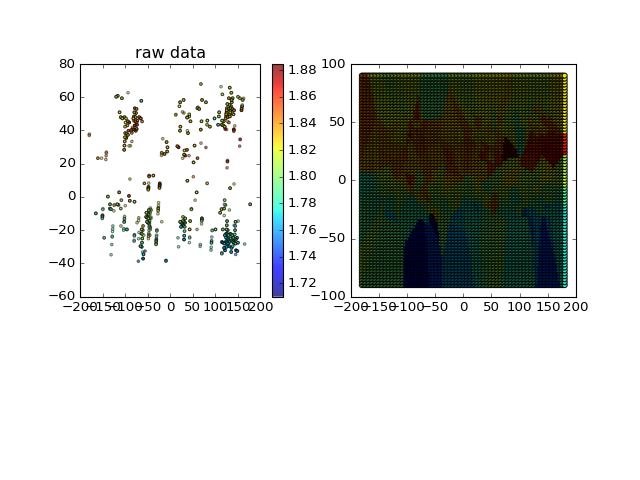

"\nplt.subplot(222)\n#plt.imshow(grid_z0)\nplt.contourf(xi, yi, grid_z0, 15, cmap=plt.cm.jet)\nplt.xlim(-180, 180)\nplt.ylim(-90, 90)\nplt.gcf().set_size_inches(8, 8)\nplt.show()\n\nplt.subplot(223)\n#plt.imshow(grid_z0)\nplt.contourf(xi, yi, zi, 15, cmap=plt.cm.jet)\nplt.xlim(-180, 180)\nplt.ylim(-90, 90)\nplt.gcf().set_size_inches(8, 8)\nplt.show()\n\nplt.subplot(224)\ngrid_z3 = griddata((x, y),z, (X, Y), method='nearest')\nplt.contourf(xi, yi, grid_z3, 15, cmap=plt.cm.jet)\nplt.xlim(-180, 180)\nplt.ylim(-90, 90)\nplt.gcf().set_size_inches(8, 8)\nplt.show()\n"

In [96]:
%matplotlib notebook

from scipy.interpolate import griddata

#the grid
xi = np.linspace(-180.0, 180.0, 144)
yi = np.linspace(-90.0, 90.0, 72)

X, Y = np.meshgrid(xi, yi)


#grid_z0 = griddata((x, y), z, (xi[None,:], yi[:, None]), method='nearest')
grid_z0 = griddata((x, y), z, (X, Y), method='nearest')


zi = griddata((x, y), z, (X, Y), method='nearest')


plt.subplot(221)
plt.scatter(x, y, c=z, alpha=0.5, marker='.')
plt.colorbar()
plt.title('raw data')

plt.subplot(222)
#plt.imshow(grid_z0)
plt.scatter(X, Y, c=zi, alpha=0.9, marker='o')

plt.gcf().set_size_inches(8, 8)
plt.show()

'''
plt.subplot(222)
#plt.imshow(grid_z0)
plt.contourf(xi, yi, grid_z0, 15, cmap=plt.cm.jet)
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.gcf().set_size_inches(8, 8)
plt.show()

plt.subplot(223)
#plt.imshow(grid_z0)
plt.contourf(xi, yi, zi, 15, cmap=plt.cm.jet)
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.gcf().set_size_inches(8, 8)
plt.show()

plt.subplot(224)
grid_z3 = griddata((x, y),z, (X, Y), method='nearest')
plt.contourf(xi, yi, grid_z3, 15, cmap=plt.cm.jet)
plt.xlim(-180, 180)
plt.ylim(-90, 90)
plt.gcf().set_size_inches(8, 8)
plt.show()
'''
#plt.figure()
#plt.pcolor(, data[:,1], data[:,3])
#plt.colorbar()
#plt.show()

<IPython.core.display.Javascript object>


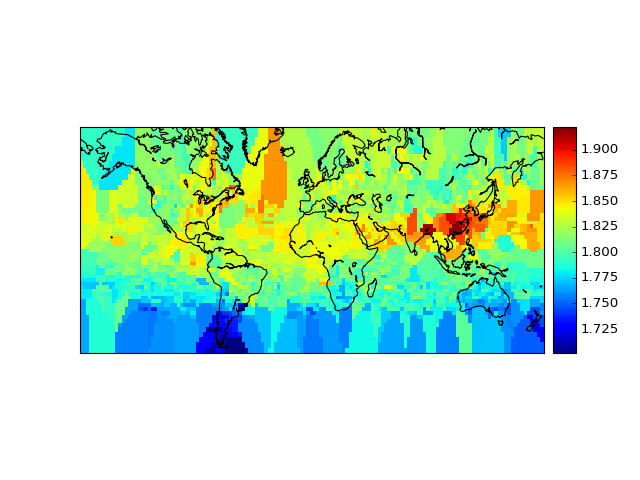

<IPython.core.display.Javascript object>


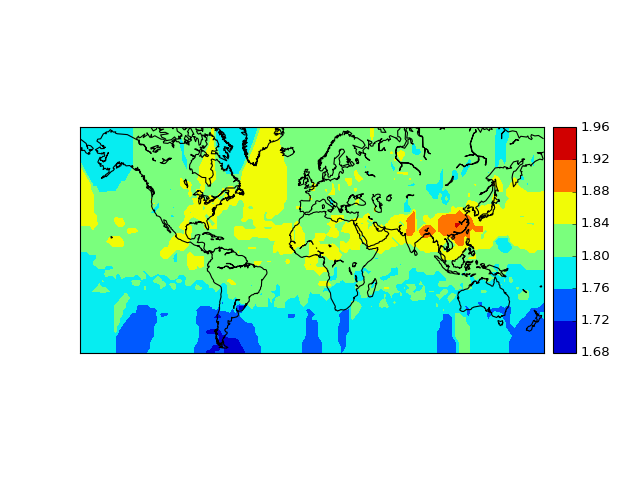

<IPython.core.display.Javascript object>


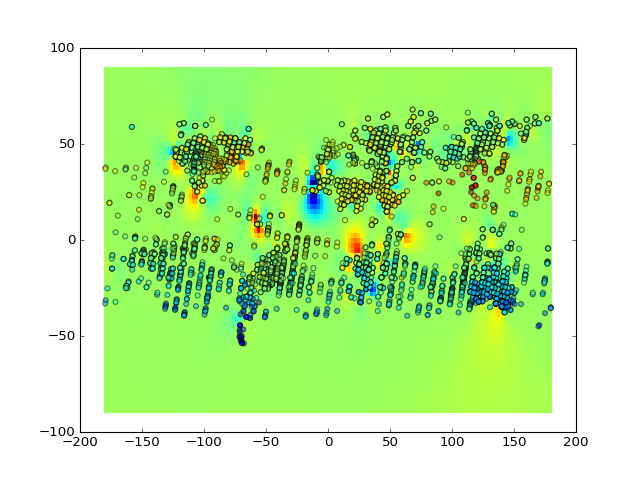

<IPython.core.display.Javascript object>


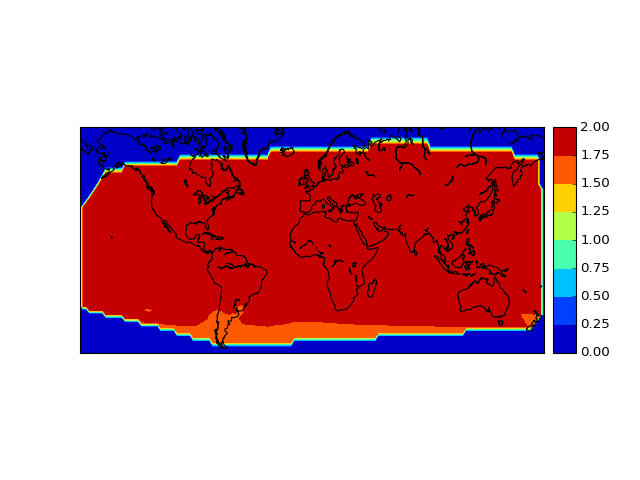

In [158]:
#various experimental plots

%matplotlib notebook

from mpl_toolkits.basemap import Basemap
from numpy import array
from scipy.interpolate import Rbf

map = Basemap(projection='merc',llcrnrlat=-57,urcrnrlat=72, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
#map = Basemap(projection="hammer", lon_0=0, llcrnrlat=-90, urcrnrlat=90, \
#                llcrnrlon=-180, urcrnrlon=180, resolution='c')

zi = griddata((x, y), z, (X, Y), method='nearest')

plt.figure(1)
map.drawcoastlines()
map.pcolormesh(X, Y, zi, latlon=True)
map.colorbar()
plt.show()

plt.figure(2)
map.drawcoastlines()
map.contourf(X, Y, zi, latlon=True)
map.colorbar()
plt.savefig(join(base_dir, "1.png", ), bbox_inches='tight', pad_inches=0.2)
plt.show()

plt.figure(3)
#map.drawcoastlines()
rbf = Rbf(x, y, z, epsilon=2)
Z = rbf(X, Y)
plt.pcolor(X, Y, Z)
plt.scatter(x, y, c=z, alpha=0.5, marker='o')
plt.show()

plt.figure(4)
zi_4 = griddata((x, y), z, (X, Y), method='linear', fill_value=0)
map.drawcoastlines()
map.contourf(X, Y, zi_4, latlon=True)
map.colorbar()

plt.show()




In [196]:
%matplotlib inline
#renders out a series of images

import h5py, array, math
import numpy as np
from os import listdir
from os.path import isfile, join
from datetime import datetime

from scipy.interpolate import griddata
from mpl_toolkits.basemap import Basemap
from datetime import datetime


# set directory containing TANSO-FTS/GOSAT L2 CH4 mixing ratio amount (SWIR) product files
# e.g. "/Users/markegge/ch4/capture/1606280000-01/1606280000-01/GOSATTFTS20150915_02C02SV0260R16062800000.h5"

base_dir = "C:/Users/markegge/work/ch4/capture/160701006B-01"

def read_file(file_path):
    f = h5py.File(file_path, 'r')
    numObs = f.get('scanAttribute')['numScan'][0]
    lats = f.get('Data').get('geolocation')['latitude'][:]
    lons = f.get('Data').get('geolocation')['longitude'][:]
    heights = f.get('Data').get('geolocation')['height'][:]
    xch4s = f.get('Data').get('mixingRatio')['XCH4'][:]
    times = f.get('scanAttribute')['time'][:]
    epoch_times = []
    for f in times:
        seconds = (datetime.strptime(f, '%Y-%m-%d %H:%M:%S.%f') - datetime(1970, 1, 1)).total_seconds()
        epoch_times.append(seconds * 1000)

    vals = np.column_stack((lons, lats, epoch_times, xch4s))
    return vals

h5files = [f for f in listdir(base_dir) if isfile(join(base_dir, f)) and f[-2:] == 'h5']


#the grid
xi = np.linspace(-180.0, 180.0, 144)
yi = np.linspace(-90.0, 90.0, 72)

XI, YI = np.meshgrid(xi, yi)

map = Basemap(projection='merc',llcrnrlat=-57,urcrnrlat=72, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

data = np.empty([1,4])
data = read_file(join(base_dir, h5files[0]))
for i in range(1, len(h5files)):
    if i % 9 == 0:
        x = data[:,0]
        y = data[:,1]
        z = data[:,3]

        zi = griddata((x, y), z, (XI, YI), method='linear')

        #fig = plt.figure()
        map.drawcoastlines()
        map.pcolormesh(X, Y, zi, cmap=plt.cm.jet, latlon=True, vmin=1.68, vmax=2.0)
        map.colorbar()
        plt.title('Methane column averaged mixing ratio (ppmv)')
        tx, ty = map(-170.0, -55.0)
        d = np.max(data[:,2])
        d = datetime.fromtimestamp(d/1000)
        fig.set_size_inches(10, 7.5)
        plt.text(tx, ty, d.strftime('%Y-%m-%d'), fontsize=12,fontweight='bold', ha='left',va='bottom',color='w', bbox=dict(facecolor='b', alpha=0.2))
        plt.savefig(join(base_dir, "%s.png" % i, ), bbox_inches='tight', pad_inches=0.2, dpi=150)
        plt.close()
        
        data = read_file(join(base_dir, h5files[i]))
    else:
        data = np.vstack((data, read_file(join(base_dir, h5files[i]))))
    
